In [43]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        # generator which yields dicts with:
        # {'title','image','thumbnail','url','height','width','source'}
        search_results = ddgs.images(keywords=term)       
        # grap number of max_images urls
        image_urls = [result.get("image") for result in search_results[:max_images]]   

        # convert to L (functionally extended list class from fastai)
        return L(image_urls)

# example usage:
urls = search_images("dog images", max_images=10)
print(urls[0])

Searching for 'dog images'
https://wallpapercave.com/wp/wp9015508.jpg


In [44]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

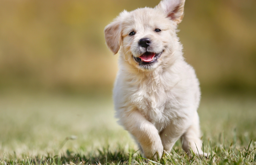

In [45]:
from fastdownload import download_url
destination = 'dog.jpg'
download_url(url=urls[0],dest=destination, show_progress=True)

from fastai.vision.all import *
image = Image.open(destination)
image.to_thumb(256,256)




Searching for 'cat images'


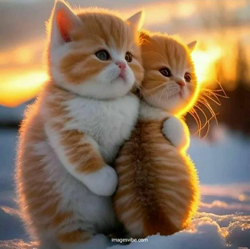

In [46]:
download_url(search_images('cat images',max_images=10)[0], dest='cat.jpg',show_progress=True)
Image.open('cat.jpg').to_thumb(250,250)



In [47]:
searches = ['forest', 'cat']
path = Path('cat_or_not')
for o in searches:
    dest = path / o
    dest.mkdir(exist_ok=True, parents=True)
    
    # Download images
    image_urls = search_images(f'{o} photo')
    download_images(dest=dest, urls=image_urls)
    
    # Resize images
    resize_image(dest, max_size=400, dest=dest)



Searching for 'forest photo'
Searching for 'cat photo'


In [48]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

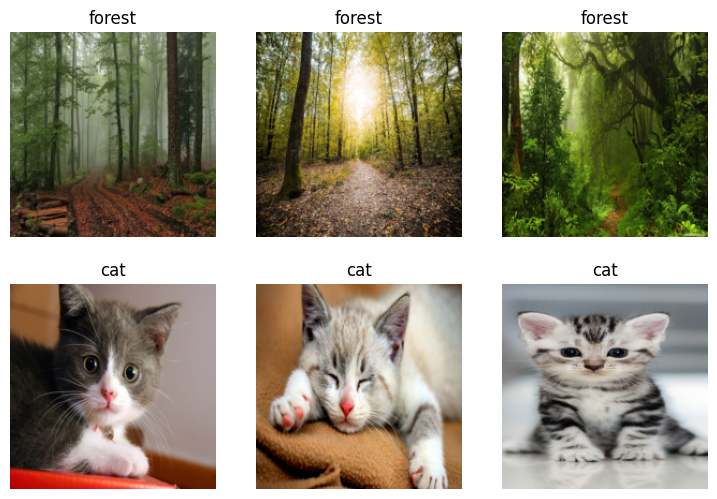

In [49]:

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=6)


dls.show_batch(max_n=6)



In [53]:


learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(epochs=8)


epoch,train_loss,valid_loss,error_rate,time
0,0.574500,0.001508,0.000000,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.232330,0.006539,0.000000,00:27
1,0.164177,0.036718,0.000000,00:22
2,0.286388,0.029498,0.032258,00:23
3,0.298137,0.000335,0.000000,00:29
4,0.247732,0.001685,0.000000,00:23
5,0.172287,0.001078,0.000000,00:22
6,0.122170,0.000456,0.000000,00:27
7,0.140344,0.007458,0.000000,00:30


In [57]:
is_cat,_,probs = learn.predict(PILImage.create('dog.jpg'))
print(f"This is a: {is_cat}.")
print(f"Probability it's a cat: {probs[0]:.4f}")

This is a: cat.
Probability it's a cat: 1.0000
